### Model showing customer's Annual Income and Spending at a Mall

In [2]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [3]:
import neattext as nft
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
mall = pd.read_csv("data/Mall_Customers.csv")
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall.shape, len(mall)

((200, 5), 200)

In [6]:
mall.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Spending_Score"}, inplace=True)


In [7]:
mall.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
mall.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
mall.dtypes

CustomerID         int64
Gender            object
Age                int64
Income             int64
Spending_Score     int64
dtype: object

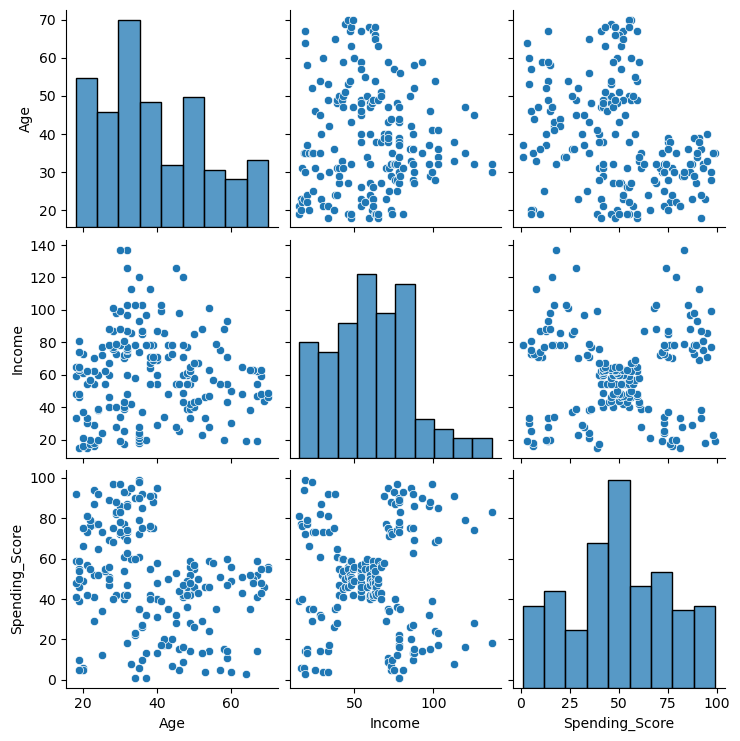

In [10]:
sns.pairplot(mall[["Age", "Income", "Spending_Score"]]);

In [11]:
import sklearn.cluster as cluster

In [12]:
# using two variable 
kmeans = cluster.KMeans(n_clusters = 5, init="k-means++") 
kmeans = kmeans.fit(mall[["Spending_Score", "Income"]]) 
kmeans.cluster_centers_

C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[17.58333333, 87.75      ],
       [49.7125    , 55.0875    ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [20.91304348, 26.30434783]])

In [13]:
mall["clusters"] = kmeans.labels_ 
mall.head()

,CustomerID,Gender,Age,Income,Spending_Score,clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [14]:
mall.clusters.value_counts()

clusters
1    80
2    39
0    36
4    23
3    22
Name: count, dtype: int64

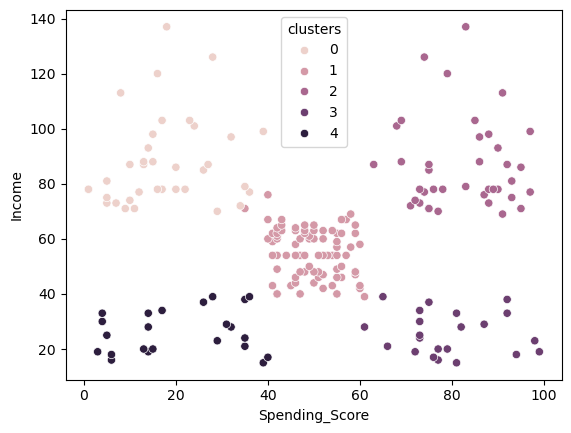

In [15]:
sns.scatterplot(x= "Spending_Score", y= "Income", hue= "clusters", data=mall);

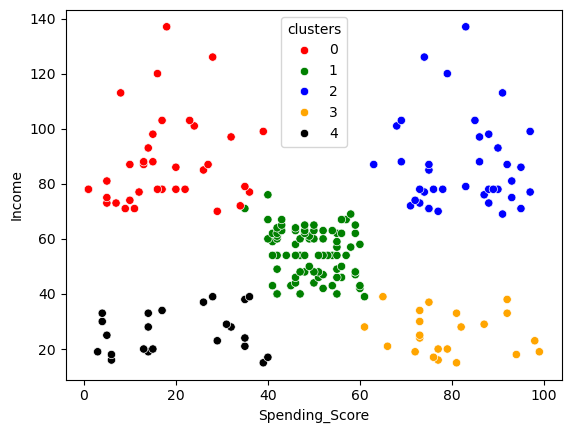

In [16]:
colors = {0:"red", 1:"green", 2:"blue", 3: "orange", 4: "black"}
sns.scatterplot(x= "Spending_Score", y= "Income", hue= "clusters", data=mall, palette= colors);

In [17]:
for export in mall["clusters"].unique(): 
    cluster_data = mall[mall["clusters"] == export]
    cluster_data.to_csv(f"cluster_{export}.csv", index=False)


In [18]:
cluster2 = pd.read_csv("cluster_2.csv") 
cluster2

,CustomerID,Gender,Age,Income,Spending_Score,clusters
0,124,Male,39,69,91,2
1,126,Female,31,70,77,2
2,128,Male,40,71,95,2
3,130,Male,38,71,75,2
4,132,Male,39,71,75,2
5,134,Female,31,72,71,2
6,136,Female,29,73,88,2
7,138,Male,32,73,73,2
8,140,Female,35,74,72,2
9,142,Male,32,75,93,2


In [19]:
cluster1 = pd.read_csv("cluster_1.csv") 
cluster1

,CustomerID,Gender,Age,Income,Spending_Score,clusters
0,44,Female,31,39,61,1
1,47,Female,50,40,55,1
2,48,Female,27,40,47,1
3,49,Female,29,40,42,1
4,50,Female,31,40,42,1
...,...,...,...,...,...,...
75,121,Male,27,67,56,1
76,122,Female,38,67,40,1
77,123,Female,40,69,58,1
78,127,Male,43,71,35,1


In [20]:
cluster0 = pd.read_csv("cluster_0.csv") 
cluster0

,CustomerID,Gender,Age,Income,Spending_Score,clusters
0,125,Female,23,70,29,0
1,129,Male,59,71,11,0
2,131,Male,47,71,9,0
3,133,Female,25,72,34,0
4,135,Male,20,73,5,0
5,137,Female,44,73,7,0
6,139,Male,19,74,10,0
7,141,Female,57,75,5,0
8,145,Male,25,77,12,0
9,147,Male,48,77,36,0
